In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #baru ditambah
from statsmodels.stats.proportion import proportions_ztest #baru ditambah
from scipy.stats import chi2 #baru ditambah
from scipy.stats import chisquare
from tabulate import tabulate
import warnings
from scipy.stats import kruskal


In [52]:
df = pd.read_csv('Supermarket Customers.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,1/8/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,1/8/2012,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,1/8/2012,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,1/8/2012,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/9/2012,94,173,...,5,0,0,0,0,0,0,3,11,0


In [53]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    1/8/2012       58       635  ...                  7             0   
1    1/8/2012       38        11  ...                  5             0   
2    1/8/2012       26       426  ...                  4             0   
3    1/8/2012       26        11  ...                  6             0   
4    1/9/2012       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [54]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [123]:
data = df.dropna()  # Menghapus nilai NaN dalam df

In [129]:
plt.figure(figsize=(10, 6)) 
sns.histplot(data['numerical_column'], kde=True)  # Mengakses kolom 'numerical_column' dari data yang bersih
plt.title('Distribution of Numerical Column') 
plt.xlabel('Value') 
plt.ylabel('Frequency') 
plt.show()

KeyError: 'numerical_column'

<Figure size 1000x600 with 0 Axes>

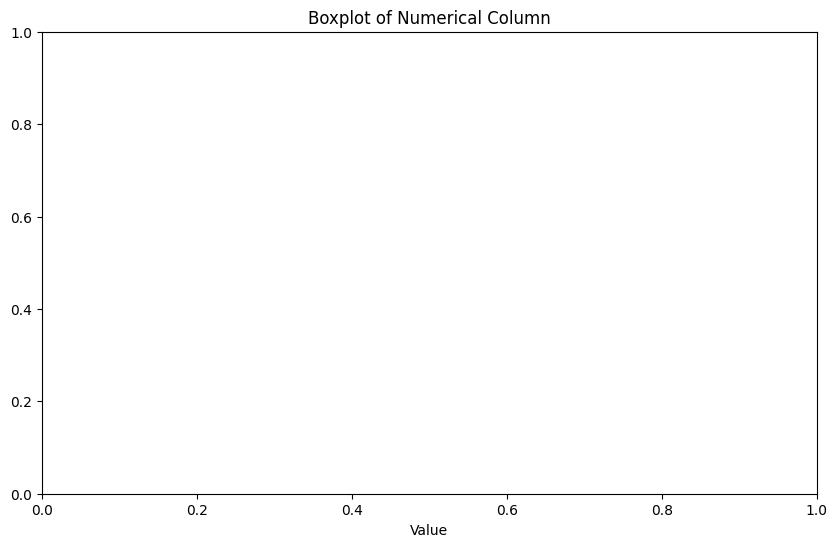

In [91]:
plt.figure(figsize=(10, 6))  
plt.title('Boxplot of Numerical Column') 
plt.xlabel('Value') 
plt.show()

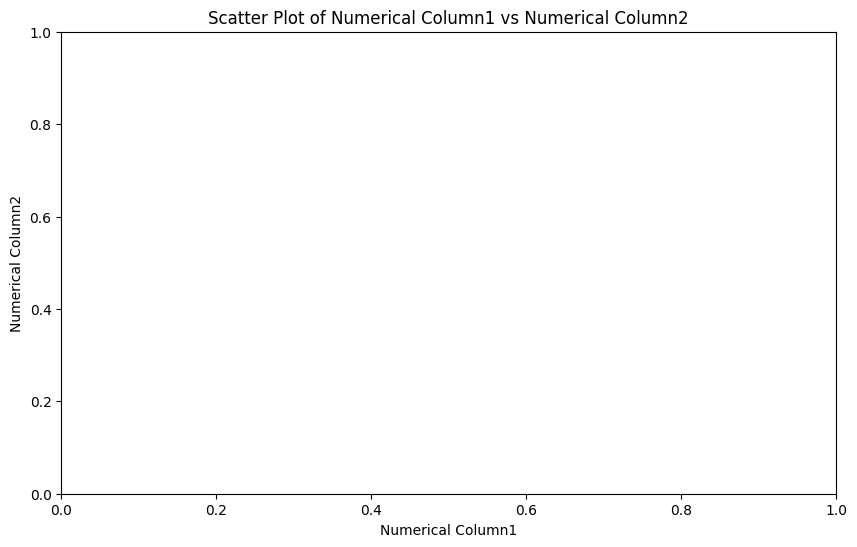

In [58]:
plt.figure(figsize=(10, 6)) 
plt.title('Scatter Plot of Numerical Column1 vs Numerical Column2') 
plt.xlabel('Numerical Column1') 
plt.ylabel('Numerical Column2') 
plt.show()

In [59]:
print(data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

In [60]:
correlation_matrix = data.corr() 
print(correlation_matrix)

ValueError: could not convert string to float: 'Graduation'

In [ ]:
group1 = data[data['category_column'] == 'Group1']['numerical_column'] 
group2 = data[data['category_column'] == 'Group2']['numerical_column'] 
t_stat, p_value = stats.ttest_ind(group1, group2) 
print(f'T-statistic: {t_stat}, P-value: {p_value}')

KeyError: 'category_column'

In [ ]:
alpha = 0.05 
if p_value < alpha: 
    print('Reject the null hypothesis: There is a significant difference between the two groups.') 
else: 
    print('Fail to reject the null hypothesis: There is no significant difference between the two groups.')

NameError: name 'p_value' is not defined